In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import math
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Net(nn.Module):
    def __init__(self,num_classes = 10):
        super(Net, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,64,kernel_size=3,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.Conv2d(64,64,kernel_size=3,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Conv2d(64,128,kernel_size=3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.Conv2d(128,128,kernel_size=3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Conv2d(128,256,kernel_size=3,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.Conv2d(256,256,kernel_size=3,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.Conv2d(256,256,kernel_size=3,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Conv2d(256,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.Conv2d(512,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.Conv2d(512,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Conv2d(512,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.Conv2d(512,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.Conv2d(512,512,kernel_size=3,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.AvgPool2d(kernel_size=1,stride=1),
            )
        self.classifier = nn.Sequential(
            nn.Linear(512,4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096,num_classes),
            )
    def forward(self, x):
        out = self.features(x) 
        out = out.view(out.size(0), -1)
        out = self.classifier(out)
        return out 


net = Net().to(device)
lo = []
learning_rate = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9,weight_decay = 0.001)
# optimizer = optim.Adam(net.parameters(), lr=learning_rate)
for epoch in range(15):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            lo.append(running_loss / 2000)
            running_loss = 0.0

print('Finished Training')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
[1,  2000] loss: 2.050
[1,  4000] loss: 1.778
[1,  6000] loss: 1.586
[1,  8000] loss: 1.472
[1, 10000] loss: 1.340
[1, 12000] loss: 1.251
[2,  2000] loss: 1.106
[2,  4000] loss: 1.063
[2,  6000] loss: 1.019
[2,  8000] loss: 0.973
[2, 10000] loss: 0.948
[2, 12000] loss: 0.898
[3,  2000] loss: 0.794
[3,  4000] loss: 0.784
[3,  6000] loss: 0.768
[3,  8000] loss: 0.746
[3, 10000] loss: 0.740
[3, 12000] loss: 0.749
[4,  2000] loss: 0.617
[4,  4000] loss: 0.616
[4,  6000] loss: 0.631
[4,  8000] loss: 0.616
[4, 10000] loss: 0.605
[4, 12000] loss: 0.595
[5,  2000] loss: 0.473
[5,  4000] loss: 0.498
[5,  6000] loss: 0.485
[5,  8000] loss: 0.509
[5, 10000] loss: 0.502
[5, 12000] loss: 0.511
[6,  2000] loss: 0.370
[6,  4000] loss: 0.396
[6,  6000] loss: 0.423
[6,  8000] loss: 0.424
[6, 10000] loss: 0.408
[6, 12000] loss: 0.422
[7,  2000] loss: 0.294
[7,  4000] loss: 0.333
[7,  6000] loss: 0.341
[7,  8000] los

In [2]:
 torch.cuda.is_available()

True

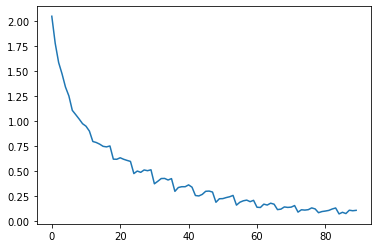

In [3]:
import matplotlib
import matplotlib.pyplot as plt
plt.plot(lo)
plt.show()

In [4]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)
dataiter = iter(testloader)
images, labels = dataiter.next()

In [5]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [6]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 81 %


In [7]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 78 %
Accuracy of   car : 91 %
Accuracy of  bird : 77 %
Accuracy of   cat : 66 %
Accuracy of  deer : 78 %
Accuracy of   dog : 72 %
Accuracy of  frog : 88 %
Accuracy of horse : 85 %
Accuracy of  ship : 92 %
Accuracy of truck : 85 %
